# Example: CitiBike data

Adapted from Kelsey Jordahl
https://gist.github.com/kjordahl/5957573

In [9]:
import requests  
import json
from pyproj import Proj
from shapely.geometry import Point
import geopandas as gp

NYC borough boundaries downloaded from [Bytes of the Big Apple](http://www.nyc.gov/html/dcp/download/bytes/nybb_13a.zip)

In [10]:
boros = gp.GeoDataFrame.from_file('nybb_15b/nybb.shp')

Load real time bike station data from [CitiBike](http://citibikenyc.com) json API:

In [11]:
# get the bike data and convert it to a ditcionary
endpoint_url = 'http://citibikenyc.com/stations/json'
response = requests.get(endpoint_url)
data = json.loads(response.text)


In [4]:
# convert the relevant part to a geodataframe
df = gp.GeoDataFrame(data['stationBeanList'])
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,13,24,,72,,2017-02-16 01:31:28 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,26,5,,79,,2017-02-16 01:30:46 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,18,8,,82,,2017-02-16 01:32:02 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,27,33,,83,,2017-02-16 01:28:52 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,7,32,,116,,2017-02-16 01:29:34 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39


In [5]:
# there is one row for each bike station.  How many stations are there? 
len(df)

666

In [7]:
# in the file above, there are lon-lats, but no geometry field
# we need to set that up

s = gp.GeoSeries([Point(x, y) for x, y in zip(df['longitude'], df['latitude'])])
df['geometry'] = s
df.crs = {'init': 'epsg:4326', 'no_defs': True}
df.geometry.total_bounds

(-74.096936600000006,
 40.661063371900603,
 -73.929891100000006,
 40.804212999999997)

In [8]:
# make sure they are on the same CRS.  
# checking the bounds is a nice way of seeing this
df.to_crs(boros.crs, inplace=True)
df.geometry.total_bounds

(957370.14732175611,
 180120.27032614074,
 1003695.8507545569,
 232275.23054640222)

In [10]:
df.crs

{'datum': 'NAD83',
 'lat_0': 40.16666666666666,
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lon_0': -74,
 'no_defs': True,
 'proj': 'lcc',
 'units': 'us-ft',
 'x_0': 300000,
 'y_0': 0}

In [9]:
# the geometry objects can do lots of cool stuff.  For example: 

manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

367 stations in Manhattan


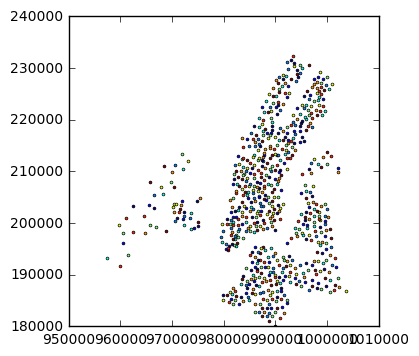

In [14]:
%matplotlib inline
df.plot()

# Your turn

You can read about the range of operations available in geopandas here: 
    
http://geopandas.org/index.html

Your assignment is to: 

1. Calculate how many stations are in each borough
2. Calculate how many bikes are currently available in each borough
3. Read about and try at least two new spatial or geometric operations (beyond what I've covered here). 

In [2]:
import requests  
import json
from pyproj import Proj
from shapely.geometry import Point
import geopandas as gp
import pandas as pd

In [3]:
boros = gp.GeoDataFrame.from_file('nybb_15b/nybb.shp')

In [4]:
endpoint_url = 'http://citibikenyc.com/stations/json'
response = requests.get(endpoint_url)
data = json.loads(response.text)

In [5]:
df = gp.GeoDataFrame(data['stationBeanList'])
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,15,22,,72,,2017-02-21 12:43:02 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,11,22,,79,,2017-02-21 12:46:14 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,8,18,,82,,2017-02-21 12:43:40 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,32,29,,83,,2017-02-21 12:46:35 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,23,16,,116,,2017-02-21 12:46:44 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39


In [6]:
s = gp.GeoSeries([Point(x, y) for x, y in zip(df['longitude'], df['latitude'])])
df['geometry'] = s
df.crs = {'init': 'epsg:4326', 'no_defs': True}
df.geometry.total_bounds

(-74.096936600000006,
 40.661063371900603,
 -73.929891100000006,
 40.804212999999997)

In [7]:
df.to_crs(boros.crs, inplace=True)
df.geometry.total_bounds

(957370.14732175611,
 180120.27032614074,
 1003695.8507545569,
 232275.23054640222)

In [8]:
manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

366 stations in Manhattan


In [9]:
queens = boros.geometry[2]
in_qs = df.geometry.within(queens)
print(sum(in_qs), 'stations in Queens')

13 stations in Queens


In [10]:
brooklyn = boros.geometry[1]
in_bn = df.geometry.within(brooklyn)
print(sum(in_bn), 'stations in Brooklyn')

236 stations in Brooklyn


In [11]:
staten = boros.geometry[0]
in_si = df.geometry.within(staten)
print(sum(in_si), 'stations in Staten Island')

0 stations in Staten Island


In [12]:
bronx = boros.geometry[4]
in_bx = df.geometry.within(bronx)
print(sum(in_bx), 'stations in Bronx')

0 stations in Bronx


In [13]:
bikebx = boros.geometry[4]
a_bronx= df.geometry.within(bikebx)
df['witha_bronx']=a_bronx
df2=df[df['witha_bronx']==True]
print(sum(df2.availableBikes), 'available bikes in Bronx')

bikemn = boros.geometry[3]
a_man= df.geometry.within(bikemn)
df['witha_man']=a_man
df2=df[df['witha_man']==True]
print(sum(df2.availableBikes), 'available bikes in Manhatten')

bikeqn = boros.geometry[2]
a_queen= df.geometry.within(bikeqn)
df['witha_queen']=a_queen
df2=df[df['witha_queen']==True]
print(sum(df2.availableBikes), 'available bikes in Queens')

bikebn = boros.geometry[1]
a_brook= df.geometry.within(bikebn)
df['witha_brook']=a_brook
df2=df[df['witha_brook']==True]
print(sum(df2.availableBikes), 'available bikes in Brooklyn')

bikesi = boros.geometry[0]
a_staten= df.geometry.within(bikesi)
df['witha_staten']=a_bronx
df2=df[df['witha_staten']==True]
print(sum(df2.availableBikes), 'available bikes in Staten Island')

0 available bikes in Bronx
4034 available bikes in Manhatten
158 available bikes in Queens
2160 available bikes in Brooklyn
0 available bikes in Staten Island
